In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [2]:
# створення датасету з файлу
df = pd.read_csv('internet_service_churn.csv')

# Data cleaning

In [3]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [5]:
df.isna().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,21572
service_failure_count,0
download_avg,381
upload_avg,381
download_over_limit,0


In [6]:
# Create 'is_contract' column: 1 if 'reamining_contract' is not null, else 0
df['is_contract'] = df['reamining_contract'].notna().astype(int)

# Replace nulls in 'reamining_contract' with 0
df['reamining_contract'] = df['reamining_contract'].fillna(0)

# Define the desired column order
column_names = [
    'id', 'is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
    'bill_avg', 'reamining_contract', 'is_contract', 'service_failure_count',
    'download_avg', 'upload_avg', 'download_over_limit', 'churn'
]

# Reorder the DataFrame columns
df = df[column_names]

In [7]:
df.head(10)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,1,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,1,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,0,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0,0.0,0.0,0,1
5,56,1,1,11.94,32,1.38,1,0,69.4,4.0,0,0
6,71,0,0,8.96,18,0.00,1,0,21.3,2.0,0,1
7,84,0,0,5.48,14,0.00,0,1,0.0,0.0,0,1
8,94,0,0,8.54,0,0.00,0,0,0.0,0.0,0,1
9,112,0,0,8.33,0,0.00,0,0,0.0,0.0,0,1


In [8]:
df.isna().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,0
is_contract,0
service_failure_count,0
download_avg,381
upload_avg,381


In [9]:
# Replace empty strings with NaN in 'download_avg' and 'upload_avg' columns
df[['download_avg', 'upload_avg']] = df[['download_avg', 'upload_avg']].replace('', np.nan)

# Drop rows where either 'download_avg' or 'upload_avg' is NaN
df.dropna(subset=['download_avg', 'upload_avg'], inplace=True)

In [10]:
df.isna().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,0
is_contract,0
service_failure_count,0
download_avg,0
upload_avg,0


# EDA

## Churn

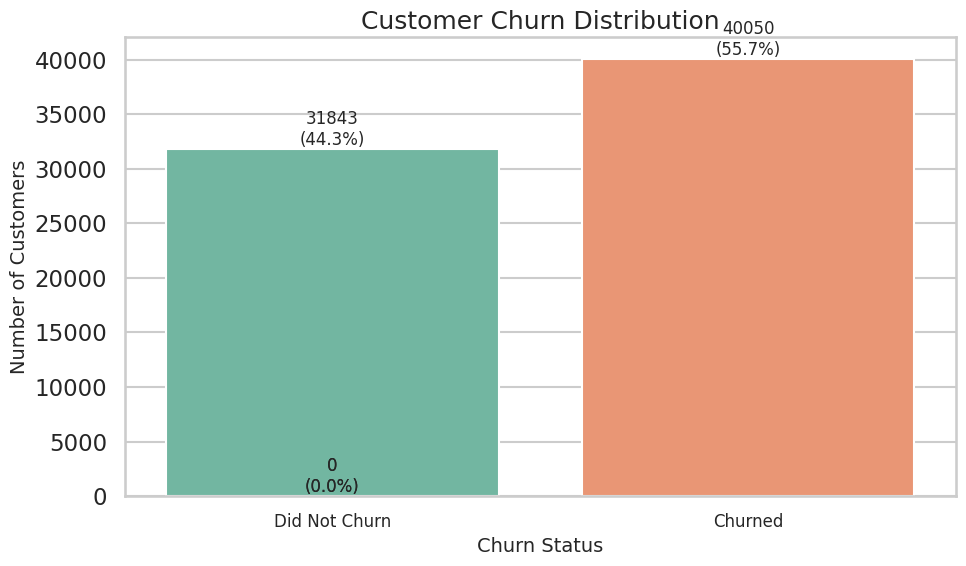

In [11]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10, 6))

# Create the count plot with 'churn' as both x and hue variables
ax = sns.countplot(data=df, x='churn', hue='churn', palette='Set2', dodge=False)

plt.title("Customer Churn Distribution", fontsize=18)
plt.xlabel("Churn Status", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

ax.legend_.remove()

ax.set_xticks([0, 1])  # Positions corresponding to 'churn' categories
ax.set_xticklabels(['Did Not Churn', 'Churned'], fontsize=12)

# Annotate each bar with the count and percentage
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = count
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=12)

plt.tight_layout()

plt.show()

There is imbalance in the data with 40050 who has churned & 31843 who has not churned.

## Comparison of Subscribers

In [12]:
df[["is_tv_subscriber","is_movie_package_subscriber"]].sum()

,0
is_tv_subscriber,58609
is_movie_package_subscriber,24017


In [13]:
subscription_counts = pd.crosstab(df['is_tv_subscriber'], df['is_movie_package_subscriber'])
subscription_counts

is_movie_package_subscriber,0,1
is_tv_subscriber,,
0,13282,2
1,34594,24015



Comparison of Subscribers:
  * There are more customers with TV subscriptions than those with movie package subscriptions.

Movie-Only Subscribers:
  * Only two customers have opted for the movie package without a TV subscription. Generally, customers who subscribe to the movie package also have a TV subscription.

Subscription Statistics:
  * A total of 13,282 customers did not opt for either TV or movie subscriptions.
  * 24,015 customers opted for both TV and movie subscriptions.

## Is TV subscribers cousing churn

[Text(0.5, 0, 'Tv subscriber or not')]

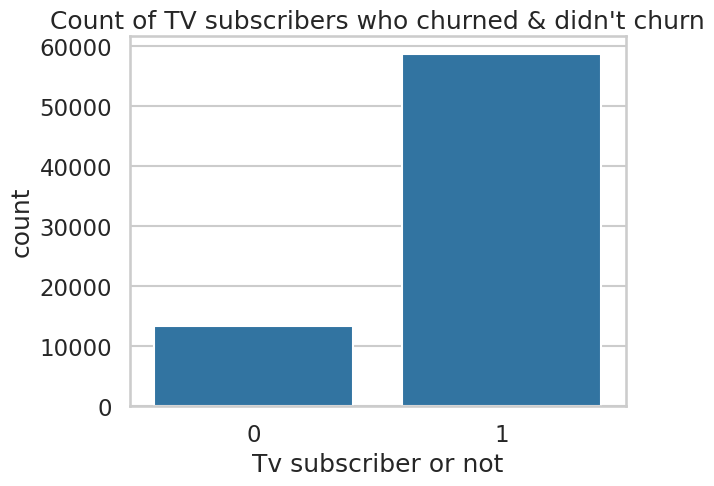

In [14]:
plt.title("Count of TV subscribers who churned & didn't churn")
ax = sns.countplot(x = 'is_tv_subscriber', data = df)
ax.set(xlabel='Tv subscriber or not')

## Is movie subscribers causing churn?

[Text(0.5, 0, 'Movie subscriber or not')]

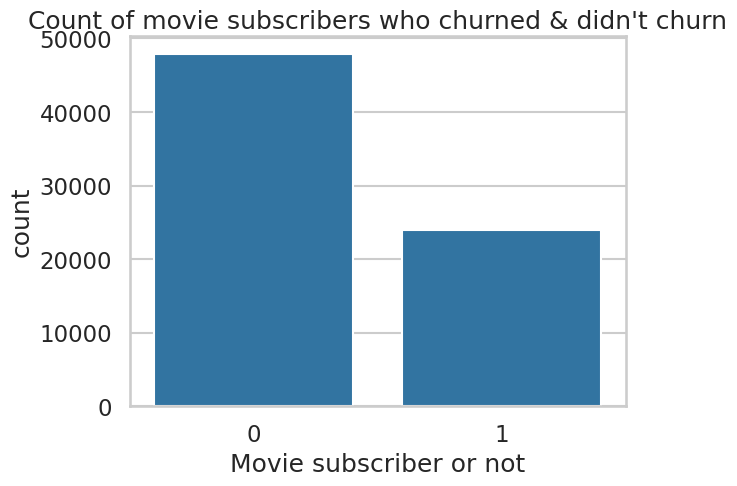

In [15]:
plt.title("Count of movie subscribers who churned & didn't churn")
ax = sns.countplot(x = 'is_movie_package_subscriber', data = df)
ax.set(xlabel='Movie subscriber or not')

# Modeling

## Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
)

# Select features and target variable
X = df[
    [
        'is_tv_subscriber',
        'subscription_age',
        'service_failure_count',
        'download_avg',
        'is_contract',
        'bill_avg',
        'reamining_contract',
    ]
]
y = df['churn']

# Split the data into training and validation sets with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size=0.7, random_state=2, stratify=y
)

# Define the preprocessing and modeling pipeline
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),  # Feature scaling
        (
            'logistic',
            LogisticRegression(
                solver='liblinear',
                class_weight='balanced',
                random_state=2,
                max_iter=1000,
            ),
        ),
    ]
)

In [17]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'logistic__C': np.logspace(-4, 4, 20),  # Regularization strength
    'logistic__penalty': ['l1', 'l2'],      # Regularization type
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)

# Fit the model using grid search to find the best parameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=2,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [18]:
# Print the best parameters found
print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)

Best parameters from GridSearchCV:
{'logistic__C': 0.012742749857031334, 'logistic__penalty': 'l1'}


In [19]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the validation set
y_pred = best_model.predict(X_val)
y_proba = best_model.predict_proba(X_val)[:, 1]

In [20]:
# Print evaluation metrics
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)

print("ROC AUC Score:")
roc_auc = roc_auc_score(y_val, y_proba)
print(f"{roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      9553
           1       0.89      0.90      0.90     12015

    accuracy                           0.88     21568
   macro avg       0.88      0.88      0.88     21568
weighted avg       0.88      0.88      0.88     21568

Confusion Matrix:
[[ 8242  1311]
 [ 1215 10800]]
ROC AUC Score:
0.9326


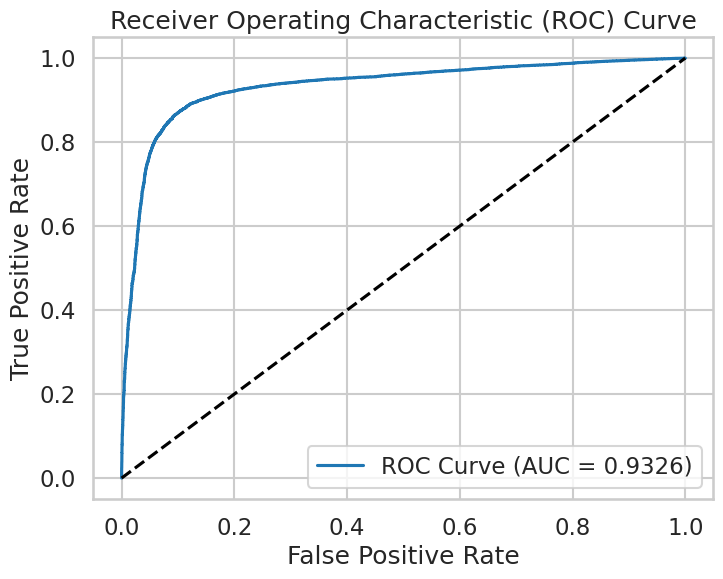

In [21]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

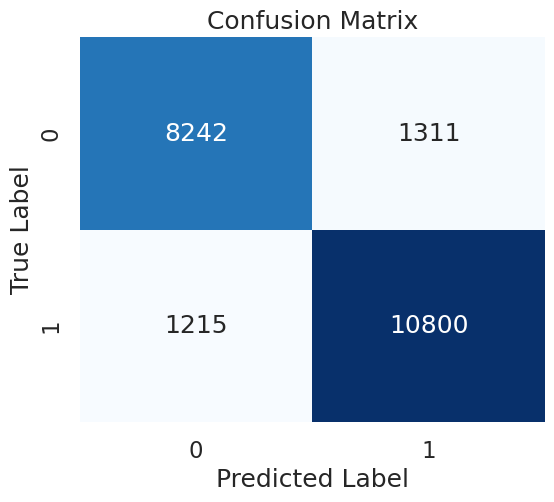

In [22]:
# Plot Confusion Matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
# Get feature names and coefficients
feature_names = X.columns
coefficients = best_model.named_steps['logistic'].coef_[0]

# Create a DataFrame of features and their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

print("\nFeature Coefficients:")
print(coef_df[['Feature', 'Coefficient']])


Feature Coefficients:
                 Feature  Coefficient
6     reamining_contract    -1.923152
3           download_avg    -0.630765
1       subscription_age    -0.584732
0       is_tv_subscriber    -0.568431
4            is_contract    -0.508663
2  service_failure_count     0.101232
5               bill_avg    -0.092907


In [24]:
import joblib

joblib.dump(best_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

## Random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search_rf.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [29]:
y_pred1 = grid_search_rf.best_estimator_.predict(X_val)

print(classification_report(y_val, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9553
           1       0.96      0.93      0.95     12015

    accuracy                           0.94     21568
   macro avg       0.94      0.94      0.94     21568
weighted avg       0.94      0.94      0.94     21568



In [28]:
import joblib

# Save the best model to a file
joblib.dump(grid_search_rf.best_estimator_, 'random_forest_model.pkl')

['random_forest_model.pkl']